<a href="https://colab.research.google.com/github/mhmdbilal1016-lab/final-project/blob/main/egypt%20solar%20power.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [559]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [560]:
df=pd.read_excel('AswanData_weatherdata (1).xlsx')

Dataset Description

The dataset used in this study contains weather and environmental measurements collected from Aswan, Egypt, a region known for high solar irradiance and stable climatic conditions. The primary objective of the dataset is to support the prediction of solar power output using meteorological variables.

The dataset includes multiple daily weather features, each contributing to the understanding of environmental factors affecting photovoltaic (PV) performance. The key variables present in the dataset are:

Weather and Environmental Features

Temperature (°C): Average daily ambient temperature.

Humidity (%): Relative humidity, influencing atmospheric moisture.

Pressure (hPa): Atmospheric pressure, affecting air density and irradiance.

Wind Speed (m/s): Helps indicate cooling effects on solar panels.

Dew Point (°C): Measures humidity saturation relative to temperature.

Solar Irradiance / Solar Radiation: Directly determines solar panel energy input.

Other derived environmental attributes such as thermal index or solar-related measures depending on dataset version.

Target Variable

Solar Power Output / Power_Class
The output is grouped into Low, Medium, and High categories based on solar energy produced.
For modeling purposes, these classes are encoded as:

0 = Low

1 = Medium

2 = High

Data Size and Structure

Number of Instances (Rows): 398                                             
Number of Features (Columns): Typically between 8  weather-related variables plus the target class.

Time Span: Based on daily measurements, covering a continuous period of weather observations.

Data Source

The measurements represent real-world meteorological data for Aswan, making the dataset highly relevant for solar energy analysis in desert and high-radiance environments.

Purpose of the Dataset

The dataset provides a solid foundation for:

Predicting solar PV power output

Understanding environmental impacts on energy production

Training machine learning models for energy forecasting

Analyzing correlations between weather variables and solar performance

In [561]:
df.head()

,Unnamed: 0,Date,AvgTemperture,AverageDew(point via humidity),Humidity,Wind,Pressure,Solar(PV)
0,0,2022-04-01,87.9,31.3,13.4,5.7,29.2,19.010857
1,2,2022-04-03,90.2,34.0,14.2,6.6,29.1,16.885714
2,3,2022-04-04,93.2,31.4,11.8,8.8,29.1,19.627429
3,4,2022-04-05,92.5,24.9,9.4,8.0,29.1,18.929429
4,5,2022-04-06,91.2,18.9,7.8,9.4,29.2,18.934000


In [562]:
df.shape

(398, 8)

In [563]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Unnamed: 0                      398 non-null    int64         
 1   Date                            398 non-null    datetime64[ns]
 2   AvgTemperture                   398 non-null    float64       
 3   AverageDew(point via humidity)  398 non-null    float64       
 4   Humidity                        398 non-null    float64       
 5   Wind                            398 non-null    float64       
 6   Pressure                        398 non-null    float64       
 7   Solar(PV)                       398 non-null    float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 25.0 KB


In [564]:
df.describe()

,Unnamed: 0,Date,AvgTemperture,AverageDew(point via humidity),Humidity,Wind,Pressure,Solar(PV)
count,398.000000,398,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,211.439698,2021-10-26 08:22:54.874371584,81.846482,36.754020,22.968090,10.146734,29.183040,24.375258
min,0.000000,2021-04-01 00:00:00,51.100000,15.300000,7.400000,4.400000,28.900000,8.581429
25%,102.250000,2021-07-15 06:00:00,70.850000,29.625000,15.625000,8.300000,29.100000,17.687714
50%,215.500000,2021-10-23 12:00:00,85.050000,37.250000,20.500000,10.100000,29.200000,23.476000
75%,315.750000,2022-02-14 18:00:00,93.400000,44.000000,28.975000,12.000000,29.300000,31.729571
max,421.000000,2022-04-29 00:00:00,102.700000,63.900000,47.700000,17.100000,29.600000,40.038857
std,122.655628,NaN,13.613097,8.906835,9.756598,2.509152,0.140241,7.507561


In [565]:
df.isna().sum()

,0
Unnamed: 0,0
Date,0
AvgTemperture,0
AverageDew(point via humidity),0
Humidity,0
Wind,0
Pressure,0
Solar(PV),0


In [566]:
df.duplicated().sum()

np.int64(0)

In [567]:
df = df.drop(columns=['Unnamed: 0'])


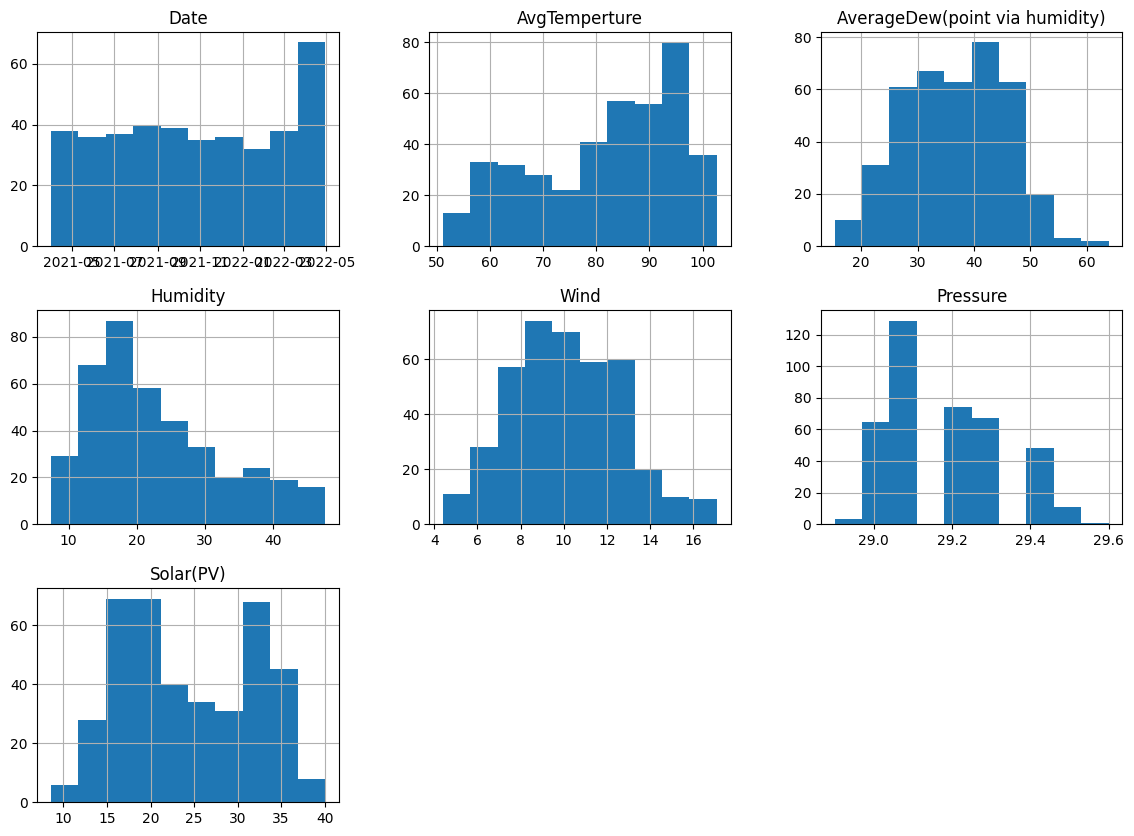

In [568]:
df.hist(figsize=(14, 10))
plt.show()


In [569]:
df['Date'] = pd.to_datetime(df['Date'])
df=df.sort_values('Date')
df.set_index('Date', inplace=True)


In [570]:
df['hour'] = df.index.hour
df['day'] = df.index.day
df['month'] = df.index.month
df['dayofyear'] = df.index.dayofyear


<Axes: xlabel='Date'>

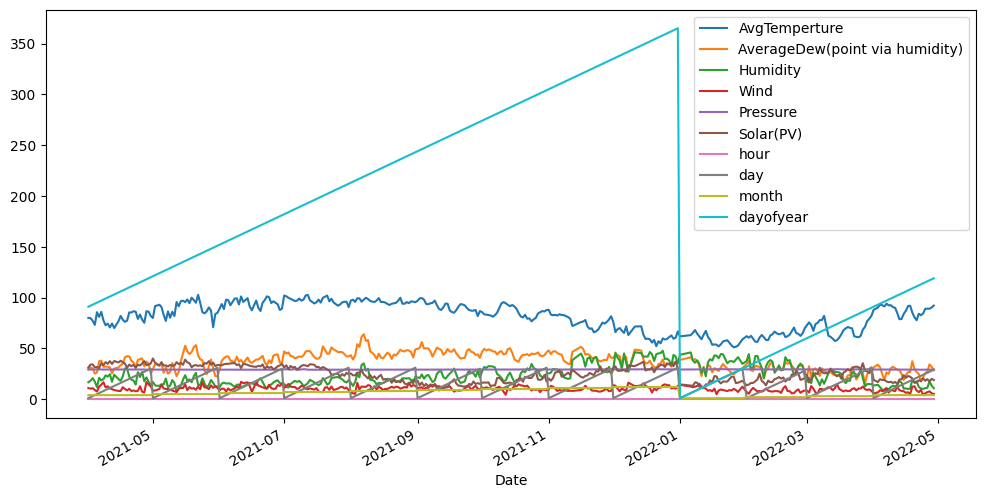

In [571]:
df.plot(figsize=(12,6))


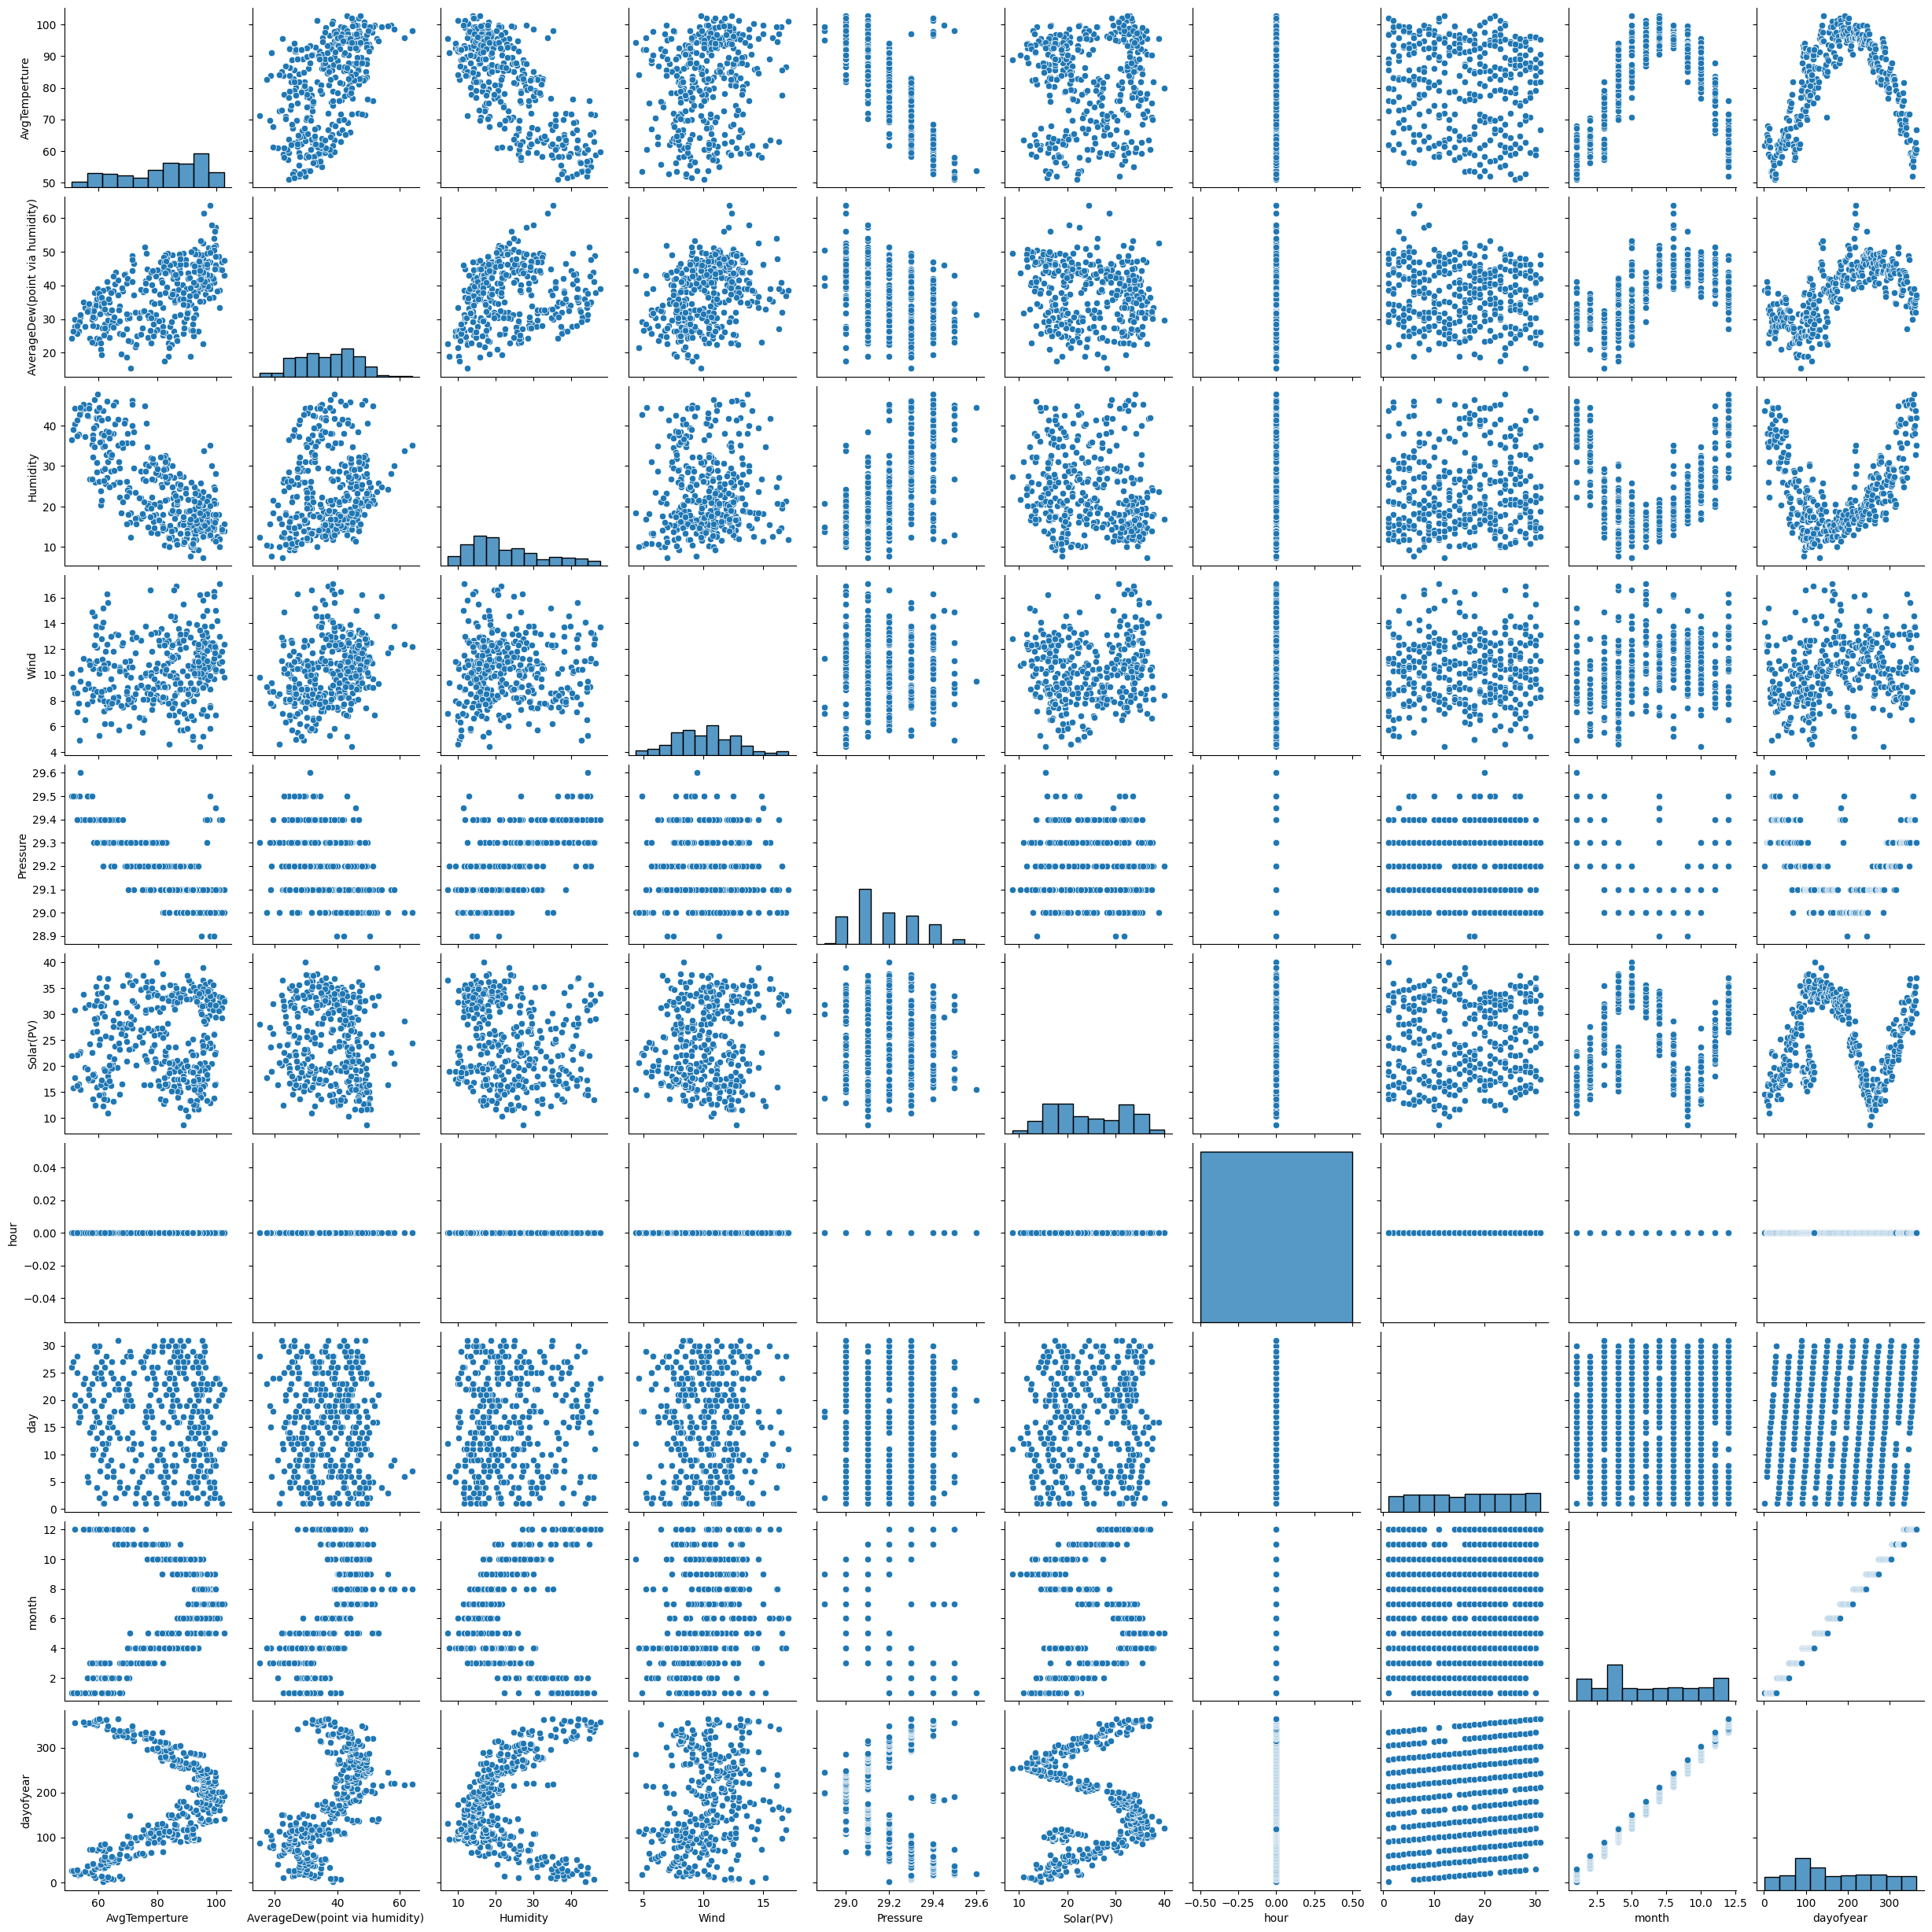

In [572]:
import seaborn as sns
sns.pairplot(df)
plt.show()


In [573]:
# Create bins
bins = 3
df["Power_Class"] = pd.qcut(df["Solar(PV)"], q=bins, labels=["Low", "Medium", "High"])

In [574]:
df["Power_Class"].value_counts()


,count
Power_Class,
Low,133
High,133
Medium,132


In [575]:
d=df.drop(columns=['Power_Class'])
stats = d.describe().T
stats["skewness"] = d.skew()
stats["kurtosis"] = d.kurtosis()
stats


,count,mean,std,min,25%,50%,75%,max,skewness,kurtosis
AvgTemperture,398.0,81.846482,13.613097,51.100000,70.850000,85.050,93.400000,102.700000,-0.528708,-0.903930
AverageDew(point via humidity),398.0,36.754020,8.906835,15.300000,29.625000,37.250,44.000000,63.900000,0.001333,-0.667801
Humidity,398.0,22.968090,9.756598,7.400000,15.625000,20.500,28.975000,47.700000,0.731028,-0.414197
Wind,398.0,10.146734,2.509152,4.400000,8.300000,10.100,12.000000,17.100000,0.223224,-0.182979
Pressure,398.0,29.183040,0.140241,28.900000,29.100000,29.200,29.300000,29.600000,0.448676,-0.633823
Solar(PV),398.0,24.375258,7.507561,8.581429,17.687714,23.476,31.729571,40.038857,0.108514,-1.288024
hour,398.0,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
day,398.0,15.854271,8.746291,1.000000,8.000000,16.000,23.000000,31.000000,-0.036293,-1.197997
month,398.0,6.188442,3.258342,1.000000,4.000000,6.000,9.000000,12.000000,0.252887,-1.103039
dayofyear,398.0,172.791457,99.725211,1.000000,97.000000,153.500,257.750000,365.000000,0.266644,-1.090207


In [576]:
d.cov()


,AvgTemperture,AverageDew(point via humidity),Humidity,Wind,Pressure,Solar(PV),hour,day,month,dayofyear
AvgTemperture,185.316398,56.149939,-97.565591,4.516890,-1.498763,3.687807,0.0,-11.919406,10.866030,314.502161
AverageDew(point via humidity),56.149939,79.331709,19.683340,7.761021,-0.363049,-5.092046,0.0,-5.879010,18.145966,547.086609
Humidity,-97.565591,19.683340,95.191196,2.206180,0.869168,-7.919480,0.0,3.364860,6.675298,210.550508
Wind,4.516890,7.761021,2.206180,6.295846,0.007306,3.154827,0.0,-0.118361,2.126688,64.449821
Pressure,-1.498763,-0.363049,0.869168,0.007306,0.019668,0.045945,0.0,-0.018976,-0.049063,-1.473697
Solar(PV),3.687807,-5.092046,-7.919480,3.154827,0.045945,56.363466,0.0,4.475924,1.294606,41.524466
hour,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
day,-11.919406,-5.879010,3.364860,-0.118361,-0.018976,4.475924,0.0,76.497601,0.533828,92.619407
month,10.866030,18.145966,6.675298,2.126688,-0.049063,1.294606,0.0,0.533828,10.616793,323.684234
dayofyear,314.502161,547.086609,210.550508,64.449821,-1.473697,41.524466,0.0,92.619407,323.684234,9945.117609


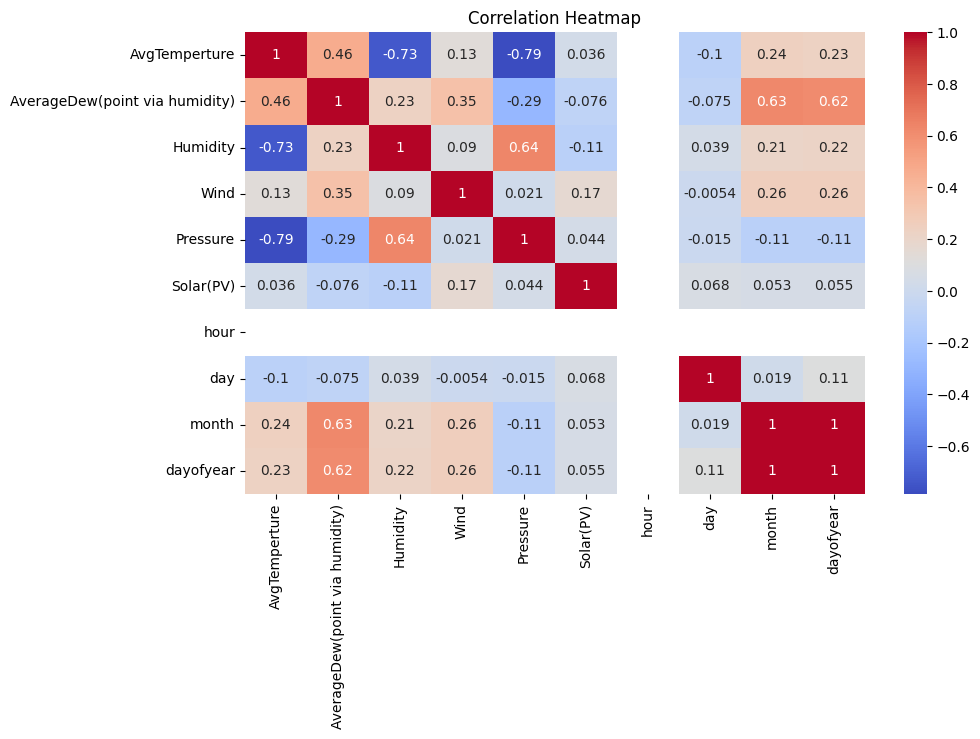

In [577]:
corr = d.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [578]:
from scipy.stats import chi2_contingency

# Convert date to month if not already done
df["month"] = df.index.month

# Create contingency table
contingency = pd.crosstab(df["Power_Class"], df["month"])

chi2, p, dof, expected = chi2_contingency(contingency)

print("Chi-square value:", chi2)
print("p-value:", p)


Chi-square value: 331.0913071410101
p-value: 5.76413028546653e-57


In [579]:
from scipy.stats import ttest_ind

high = df[df["Power_Class"] == "High"]["AvgTemperture"]
low = df[df["Power_Class"] == "Low"]["AvgTemperture"]

t_stat, p_value = ttest_ind(high, low)

print("t-statistic :", t_stat)
print("p-value :", p_value)


t-statistic : 1.089186608044754
p-value : 0.27706484208868526


In [580]:
from scipy.stats import f_oneway

low = df[df["Power_Class"] == "Low"]["AvgTemperture"]
med = df[df["Power_Class"] == "Medium"]["AvgTemperture"]
high = df[df["Power_Class"] == "High"]["AvgTemperture"]

F, p = f_oneway(low, med, high)

print("F-statistic:", F)
print("p-value:", p)

F-statistic: 3.3896394714043594
p-value: 0.034704694049835824


In [581]:
df = df.rename(columns={
    'AvgTemperture': 'Temperature',
    'AverageDew(point via humidity)': 'DewPoint',
    'Solar(PV)': 'SolarPower'
})


In [582]:
df['Temp_roll3'] = df['Temperature'].rolling(3).mean()
df['Humidity_roll3'] = df['Humidity'].rolling(3).mean()
df['Solar_roll3'] = df['SolarPower'].rolling(3).mean()


In [583]:
df.dropna(inplace=True)

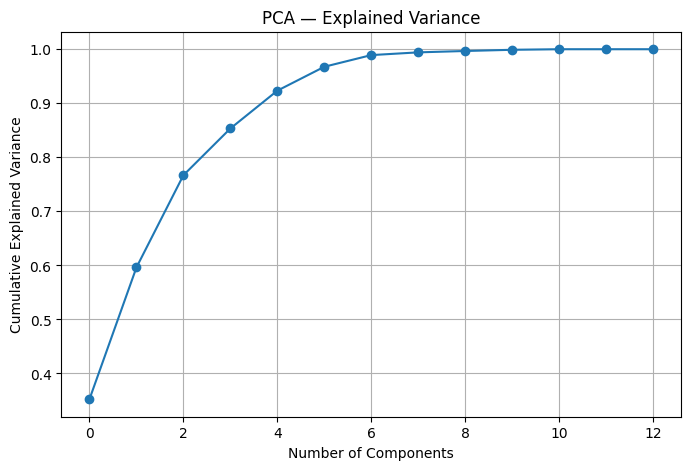

In [584]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Select numeric features (exclude class column)
numeric_df = df.select_dtypes(include=[np.number])

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_df)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance
explained_variance = pca.explained_variance_ratio_

# Plot explained variance
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA — Explained Variance")
plt.grid()
plt.show()

# Create PCA dataframe with 2 components
pca_df = pd.DataFrame({
    "PC1": X_pca[:, 0],
    "PC2": X_pca[:, 1],
    "Power_Class": df["Power_Class"]
})


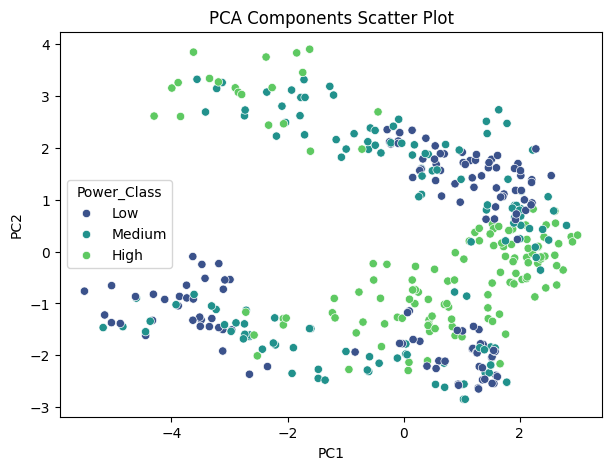

In [585]:
import seaborn as sns

plt.figure(figsize=(7, 5))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Power_Class", palette="viridis")
plt.title("PCA Components Scatter Plot")
plt.show()


In [586]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# LDA needs numeric features and the class target
X = numeric_df
y = df["Power_Class"]

# Fit LDA
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X, y)

# Create dataframe
lda_df = pd.DataFrame({
    "LD1": X_lda[:, 0],
    "LD2": X_lda[:, 1],
    "Power_Class": y
})


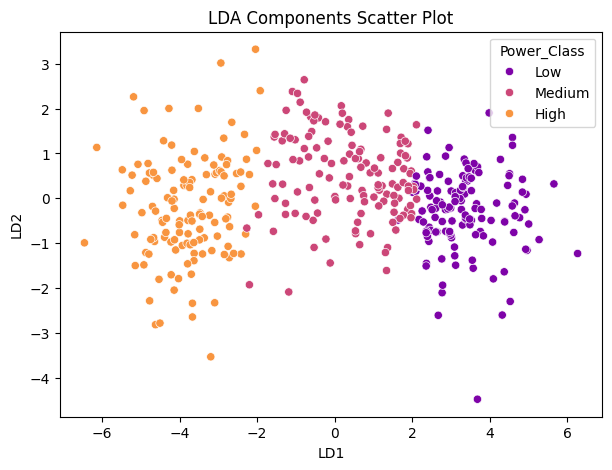

In [587]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=lda_df, x="LD1", y="LD2", hue="Power_Class", palette="plasma")
plt.title("LDA Components Scatter Plot")
plt.show()


In [588]:
lda.explained_variance_ratio_


array([0.9857753, 0.0142247])

In [589]:
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(include='object').columns
print("numerical",num_cols)
print("categorical",cat_cols)

numerical Index(['Temperature', 'DewPoint', 'Humidity', 'Wind', 'Pressure', 'SolarPower',
       'hour', 'day', 'month', 'dayofyear', 'Temp_roll3', 'Humidity_roll3',
       'Solar_roll3'],
      dtype='object')
categorical Index([], dtype='object')


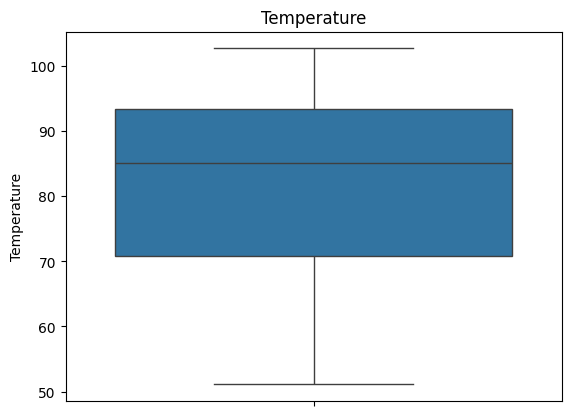

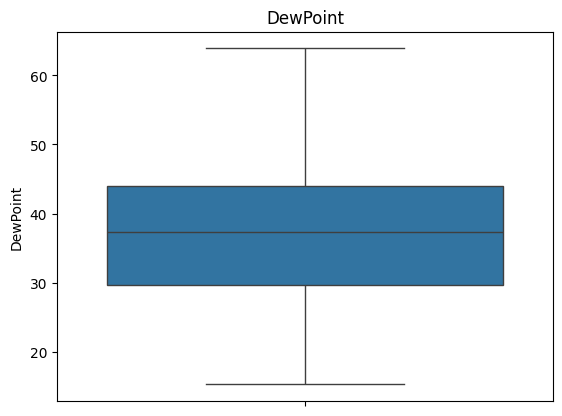

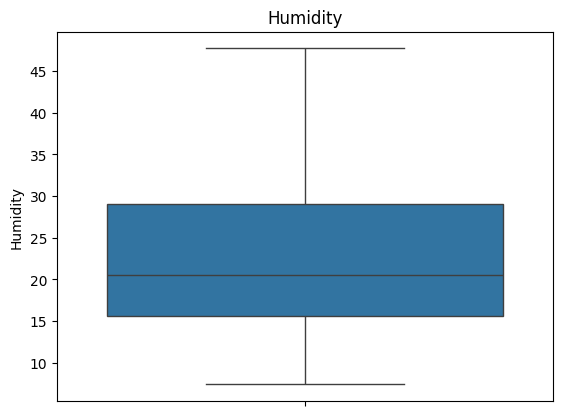

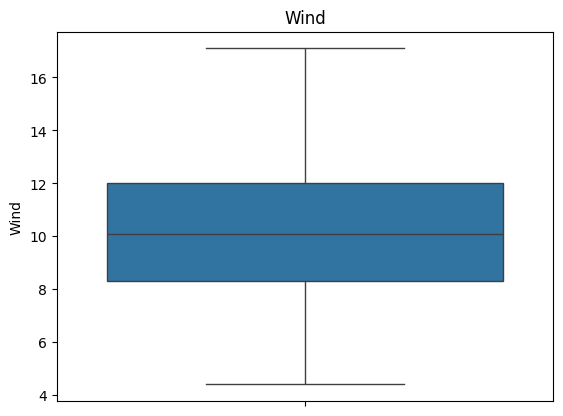

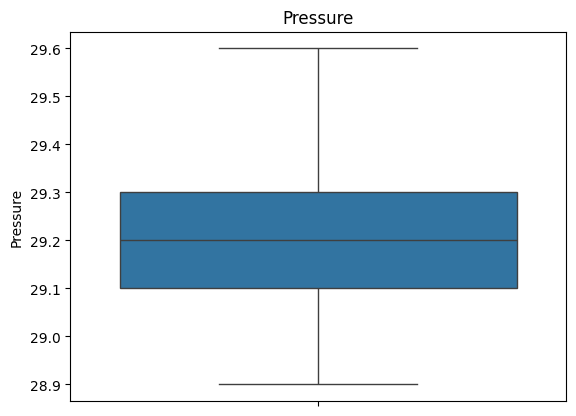

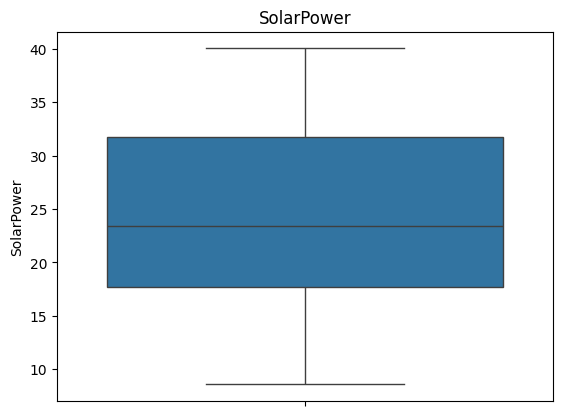

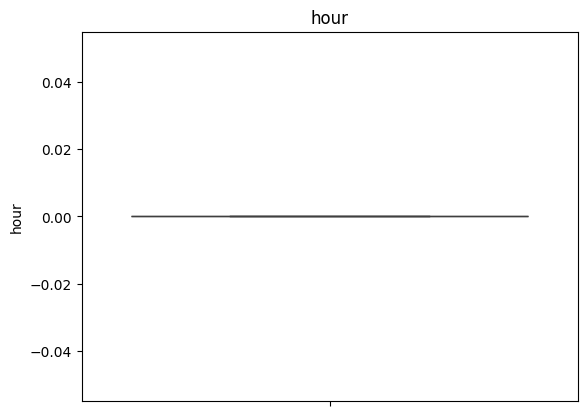

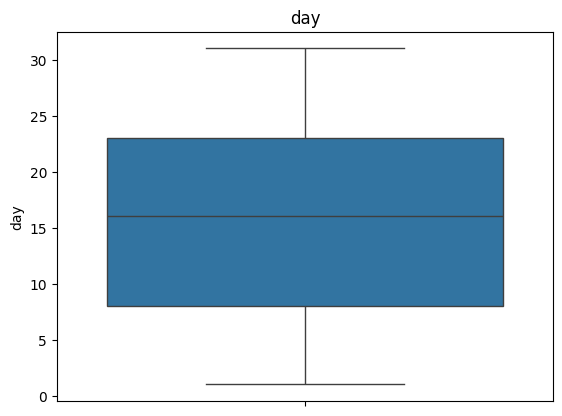

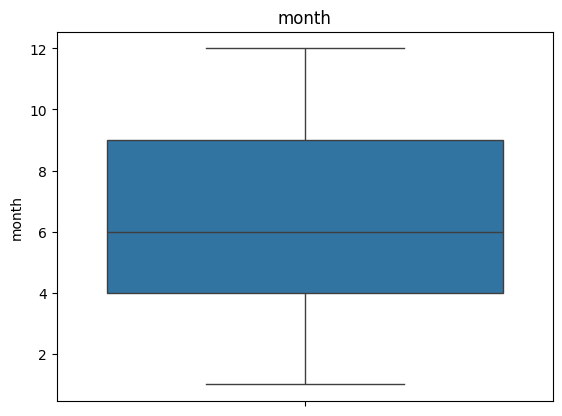

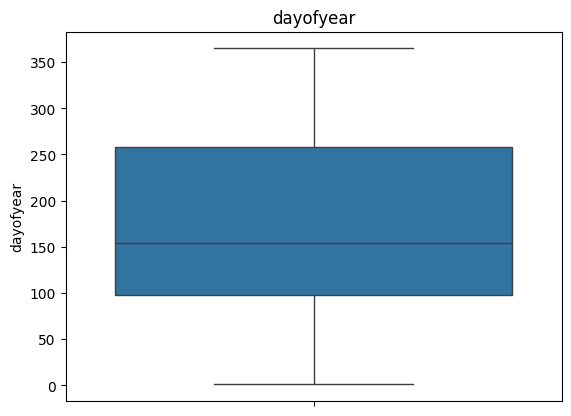

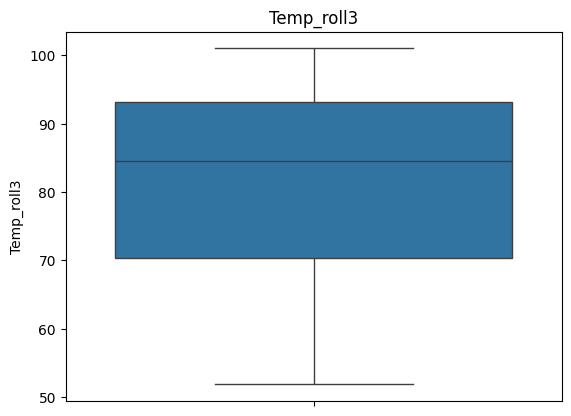

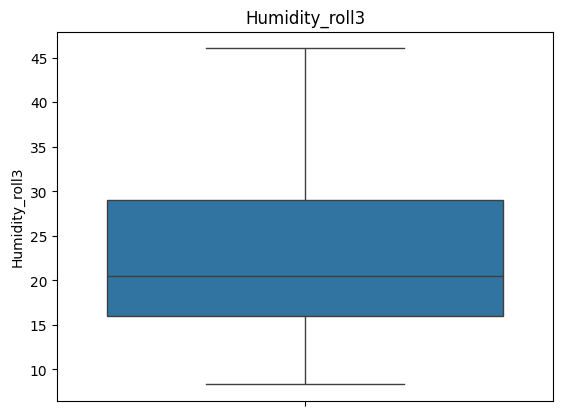

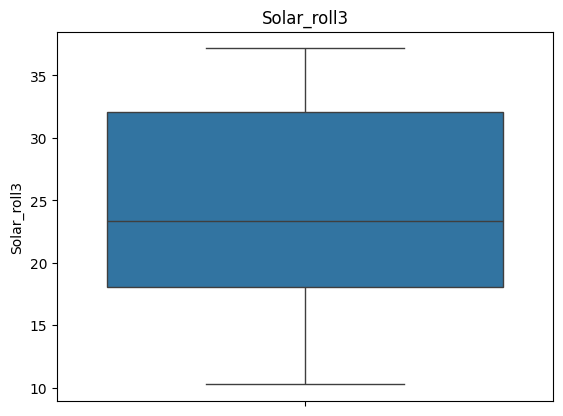

In [590]:
for i in num_cols:
  sns.boxplot(df[i])
  plt.title(i)
  plt.show()

In [591]:
from sklearn.model_selection import train_test_split

# Numeric features only (needed for NB)
X = df.select_dtypes(include="number")

# Target class
y = df["Power_Class"]

# Train-test split (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)


In [592]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(model, X, y, model_name):
    train_sizes, train_scores, val_scores = learning_curve(
        model,
        X,
        y,
        cv=5,
        scoring='accuracy',
        train_sizes=np.linspace(0.1, 1.0, 10),
        n_jobs=-1
    )

    train_mean = np.mean(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)

    plt.figure(figsize=(8,5))
    plt.plot(train_sizes, train_mean, 'o-', label='Training Accuracy')
    plt.plot(train_sizes, val_mean, 'o-', label='Validation Accuracy')
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy")
    plt.title(f"Learning Curve — {model_name}")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Interpretation
    print(f"\n📌 Interpretation for {model_name}:")
    if train_mean[-1] - val_mean[-1] > 0.1:
        print("⚠️ Overfitting detected: Training accuracy much higher than validation accuracy.")
    elif train_mean[-1] < 0.6 and val_mean[-1] < 0.6:
        print("⚠️ Underfitting detected: Both accuracies are low.")
    else:
        print("✅ Model is well-fitted: Training and validation accuracies are close.")


In [593]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

# Predictions
y_pred_nb = nb.predict(X_test)
train_accuracy_np = nb.score(X_train, y_train)
print("Training Accuracy:", train_accuracy_np)


Training Accuracy: 0.9272151898734177


In [594]:
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    precision_score, recall_score, f1_score
)

acc_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb, average="weighted")
recall_nb = recall_score(y_test, y_pred_nb, average="weighted")
f1_nb = f1_score(y_test, y_pred_nb, average="weighted")

print("Accuracy:", acc_nb)
print("Precision:", precision_nb)
print("Recall:", recall_nb)
print("F1 Score:", f1_nb)


Accuracy: 0.8375
Precision: 0.8396250000000001
Recall: 0.8375
F1 Score: 0.8383645276292334


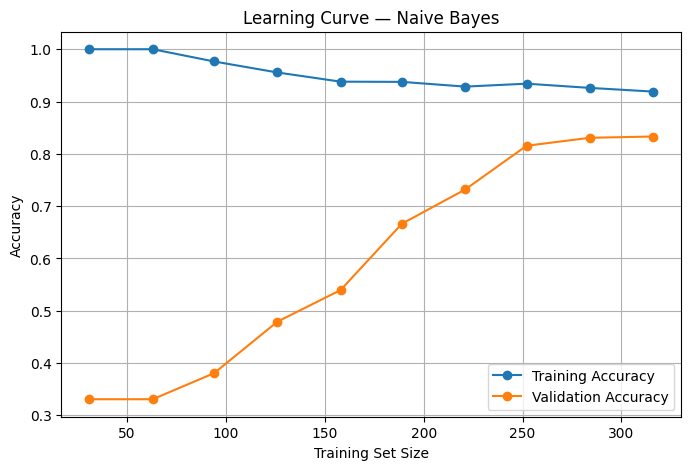


📌 Interpretation for Naive Bayes:
✅ Model is well-fitted: Training and validation accuracies are close.


In [595]:
plot_learning_curve(nb, X, y, "Naive Bayes")

In [596]:
# Your metrics printing
print("Accuracy:", acc_nb)
print("Precision:", precision_nb)
print("Recall:", recall_nb)
print("F1 Score:", f1_nb)

# ============================
# Confusion Matrix + Interpretation
# ============================
from sklearn.metrics import confusion_matrix, classification_report

def interpret_confusion_matrix(y_true, y_pred, labels=['Low','Medium','High']):
    cm = confusion_matrix(y_true, y_pred)
    report = classification_report(y_true, y_pred, target_names=labels)

    print("\n=== Confusion Matrix ===")
    print(cm)

    print("\n=== Classification Report ===")
    print(report)

    print("\n=== Interpretation ===")

    # Class-level breakdown
    for i, label in enumerate(labels):
        correct = cm[i][i]
        misclassified = cm[i].sum() - correct
        print(f"- {label.upper()} class: {correct} correct, {misclassified} misclassified.")

    print("\nGeneral Notes:")
    print("- High values on the diagonal = good classification performance.")
    print("- Off-diagonal values show where the model confuses classes.")
    print("- If Medium ↔ High confusion is high, features overlap.")

# Call it for Naive Bayes
interpret_confusion_matrix(y_test, y_pred_nb)


Accuracy: 0.8375
Precision: 0.8396250000000001
Recall: 0.8375
F1 Score: 0.8383645276292334

=== Confusion Matrix ===
[[23  0  3]
 [ 0 23  4]
 [ 2  4 21]]

=== Classification Report ===
              precision    recall  f1-score   support

         Low       0.92      0.88      0.90        26
      Medium       0.85      0.85      0.85        27
        High       0.75      0.78      0.76        27

    accuracy                           0.84        80
   macro avg       0.84      0.84      0.84        80
weighted avg       0.84      0.84      0.84        80


=== Interpretation ===
- LOW class: 23 correct, 3 misclassified.
- MEDIUM class: 23 correct, 4 misclassified.
- HIGH class: 21 correct, 6 misclassified.

General Notes:
- High values on the diagonal = good classification performance.
- Off-diagonal values show where the model confuses classes.
- If Medium ↔ High confusion is high, features overlap.


In [597]:
def check_overfitting(model_name, train_acc, test_acc, threshold=0.05):
    print(f"\n=== Overfitting/Underfitting Check for {model_name} ===")
    print(f"Training Accuracy: {train_acc:.4f}")
    print(f"Testing Accuracy : {test_acc:.4f}")

    diff = train_acc - test_acc

    if diff > threshold:
        print("⚠️ The model is OVERFITTING.")
        print("Training accuracy is much higher than testing accuracy.")
    elif diff < -threshold:
        print("⚠️ The model is UNDERFITTING.")
        print("Test accuracy is higher than training accuracy (rare but possible).")
    else:
        print("✅ The model is WELL-FITTED.")
        print("Training and testing performance are close.")
check_overfitting("Naive Bayes",train_accuracy_np, acc_nb)



=== Overfitting/Underfitting Check for Naive Bayes ===
Training Accuracy: 0.9272
Testing Accuracy : 0.8375
⚠️ The model is OVERFITTING.
Training accuracy is much higher than testing accuracy.


In [598]:
print(classification_report(y_test, y_pred_nb))


              precision    recall  f1-score   support

        High       0.92      0.88      0.90        26
         Low       0.85      0.85      0.85        27
      Medium       0.75      0.78      0.76        27

    accuracy                           0.84        80
   macro avg       0.84      0.84      0.84        80
weighted avg       0.84      0.84      0.84        80



In [599]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=None,
    random_state=42
)

dt.fit(X_train, y_train)

# Predictions
y_pred_dt = dt.predict(X_test)
dt.score(X_test, y_test)
train_accuracy_ds = dt.score(X_train, y_train)
print("Training Accuracy:", train_accuracy_ds)

Training Accuracy: 1.0


In [600]:
error_rate = 1 - dt.score(X_test, y_test)
error_rate


0.012499999999999956

In [601]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(dt, X, y, cv=5)
cv_error = 1 - cv_scores.mean()

print("Cross-validation error:", cv_error)


Cross-validation error: 0.005031645569620324


In [602]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score
)

acc_dt = accuracy_score(y_test, y_pred_dt)
pre_dt = precision_score(y_test, y_pred_dt, average="weighted")
rec_dt = recall_score(y_test, y_pred_dt, average="weighted")
f1_dt = f1_score(y_test, y_pred_dt, average="weighted")

print("Accuracy:", acc_dt)
print("Precision:", pre_dt)
print("Recall:", rec_dt)
print("F1 Score:", f1_dt)
print("Error Rate:", 1 - acc_dt)


Accuracy: 0.9875
Precision: 0.9879629629629629
Recall: 0.9875
F1 Score: 0.9875
Error Rate: 0.012499999999999956


In [603]:
def check_overfitting(model_name, train_acc, test_acc, threshold=0.05):
    print(f"\n=== Overfitting/Underfitting Check for {model_name} ===")
    print(f"Training Accuracy: {train_acc:.4f}")
    print(f"Testing Accuracy : {test_acc:.4f}")

    diff = train_acc - test_acc

    if diff > threshold:
        print("⚠️ The model is OVERFITTING.")
        print("Training accuracy is much higher than testing accuracy.")
    elif diff < -threshold:
        print("⚠️ The model is UNDERFITTING.")
        print("Test accuracy is higher than training accuracy (rare but possible).")
    else:
        print("✅ The model is WELL-FITTED.")
        print("Training and testing performance are close.")
check_overfitting("DecisionTreeClassifier",train_accuracy_ds, acc_dt)



=== Overfitting/Underfitting Check for DecisionTreeClassifier ===
Training Accuracy: 1.0000
Testing Accuracy : 0.9875
✅ The model is WELL-FITTED.
Training and testing performance are close.


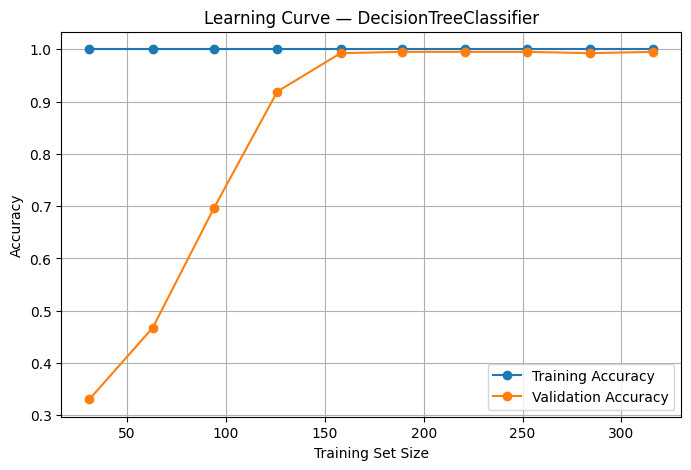


📌 Interpretation for DecisionTreeClassifier:
✅ Model is well-fitted: Training and validation accuracies are close.


In [604]:
plot_learning_curve(dt, X, y, "DecisionTreeClassifier")

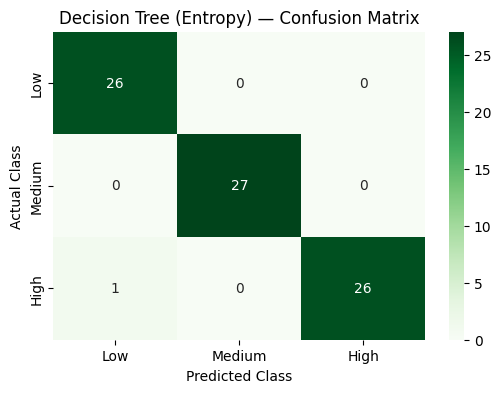

In [605]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(6,4))
sns.heatmap(
    cm, annot=True, cmap="Greens", fmt="d",
    xticklabels=["Low", "Medium", "High"],
    yticklabels=["Low", "Medium", "High"]
)
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Decision Tree (Entropy) — Confusion Matrix")
plt.show()


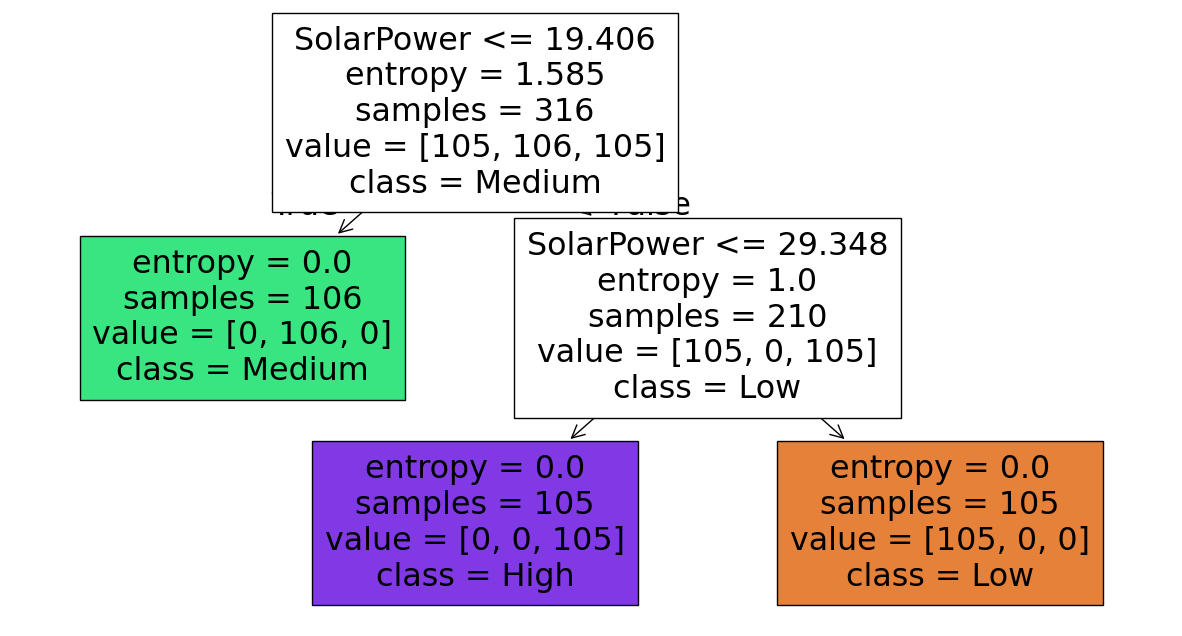

In [606]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 8))
plot_tree(dt, feature_names=X.columns, class_names=["Low", "Medium", "High"], filled=True)
plt.show()


In [607]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [608]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

acc_rf = accuracy_score(y_test, y_pred_rf)
pre_rf = precision_score(y_test, y_pred_rf, average='weighted')
rec_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

print("Accuracy:", acc_rf)
print("Precision:", pre_rf)
print("Recall:", rec_rf)
print("F1 Score:", f1_rf)


Accuracy: 0.9625
Precision: 0.9629451566951568
Recall: 0.9625
F1 Score: 0.9625


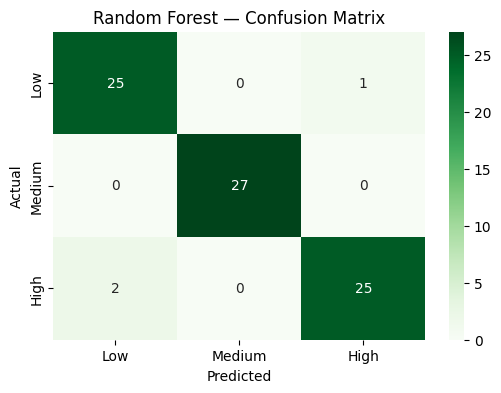

In [609]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6,4))
sns.heatmap(
    cm, annot=True, fmt="d", cmap="Greens",
    xticklabels=["Low", "Medium", "High"],
    yticklabels=["Low", "Medium", "High"]
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest — Confusion Matrix")
plt.show()


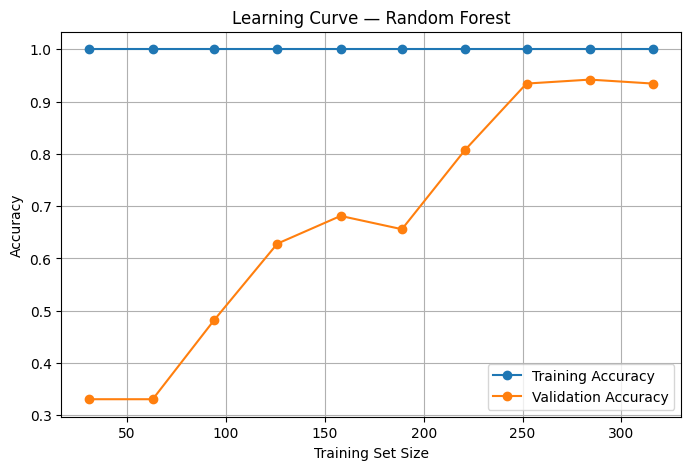


📌 Interpretation for Random Forest:
✅ Model is well-fitted: Training and validation accuracies are close.


In [610]:
plot_learning_curve(rf, X, y, "Random Forest")

/tmp/ipython-input-1489914087.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importances, x="Importance", y="Feature", palette='viridis')


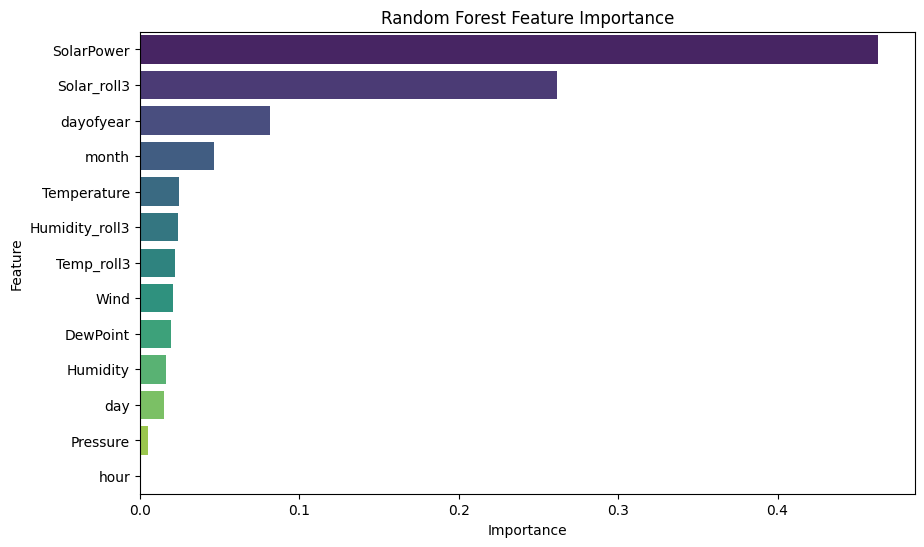

In [611]:
import pandas as pd
import numpy as np

importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=importances, x="Importance", y="Feature", palette='viridis')
plt.title("Random Forest Feature Importance")
plt.show()


In [612]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=3, scoring='accuracy')
grid.fit(X_train, y_train)

grid.best_params_


{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 500}

In [613]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)


In [614]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.9,
    colsample_bytree=0.9,
    objective='multi:softmax',
    num_class=3,
    random_state=42
)

xgb.fit(X_train, y_train_enc)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_class=3, ...)

In [615]:
y_pred_xgb = xgb.predict(X_test)


In [616]:
y_pred_xgb_labels = le.inverse_transform(y_pred_xgb)


In [617]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

acc_xgb = accuracy_score(y_test_enc, y_pred_xgb)
pre_xgb = precision_score(y_test_enc, y_pred_xgb, average="weighted")
rec_xgb = recall_score(y_test_enc, y_pred_xgb, average="weighted")
f1_xgb = f1_score(y_test_enc, y_pred_xgb, average="weighted")

print("Accuracy:", acc_xgb)
print("Precision:", pre_xgb)
print("Recall:", rec_xgb)
print("F1 Score:", f1_xgb)


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


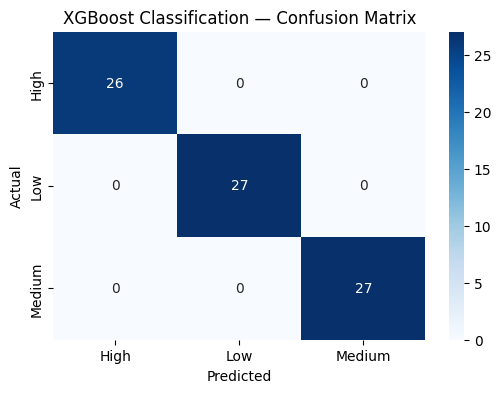

In [618]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_enc, y_pred_xgb)

plt.figure(figsize=(6,4))
sns.heatmap(
    cm, annot=True, fmt="d", cmap="Blues",
    xticklabels=le.classes_,
    yticklabels=le.classes_
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("XGBoost Classification — Confusion Matrix")
plt.show()


<Figure size 1000x800 with 0 Axes>

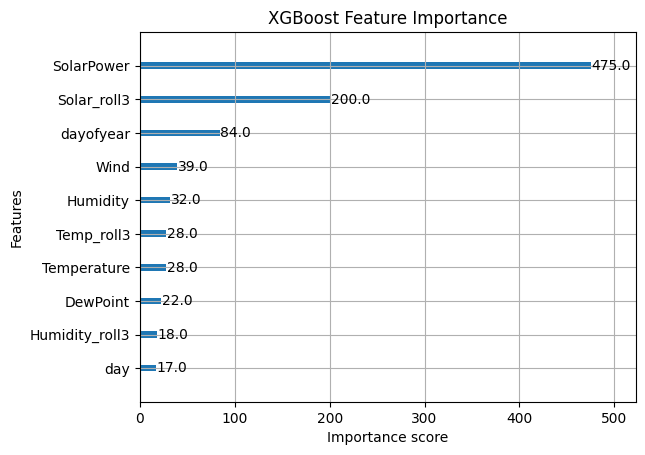

In [619]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

plt.figure(figsize=(10, 8))
plot_importance(xgb, max_num_features=10)
plt.title("XGBoost Feature Importance")
plt.show()


In [620]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)


In [621]:
from sklearn.svm import SVC

svm_rbf = SVC(kernel="rbf", C=1.0, gamma="scale")
svm_rbf.fit(x_train_scaled, y_train)

y_pred_svm = svm_rbf.predict(x_test_scaled)

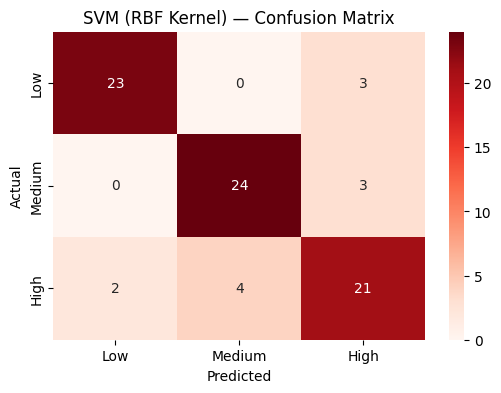

In [622]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(6,4))
sns.heatmap(
    cm, annot=True, fmt="d", cmap="Reds",
    xticklabels=["Low", "Medium", "High"],
    yticklabels=["Low", "Medium", "High"]
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SVM (RBF Kernel) — Confusion Matrix")
plt.show()


In [623]:
svm_linear = SVC(kernel="linear", C=1.0)
svm_linear.fit(x_train_scaled, y_train)
y_pred_linear = svm_linear.predict(x_test_scaled)


In [624]:
from sklearn.neighbors import KNeighborsClassifier

knn_euclidean = KNeighborsClassifier(
    n_neighbors=5,
    metric="euclidean"
)
knn_euclidean.fit(x_train_scaled, y_train)

y_pred_knn_euc = knn_euclidean.predict(x_test_scaled)


In [625]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

acc_svm = accuracy_score(y_test, y_pred_svm)
pre_svm = precision_score(y_test, y_pred_svm, average="weighted")
rec_svm = recall_score(y_test, y_pred_svm, average="weighted")
f1_svm = f1_score(y_test, y_pred_svm, average="weighted")

print("Accuracy:", acc_svm)
print("Precision:", pre_svm)
print("Recall:", rec_svm)
print("F1 Score:", f1_svm)


Accuracy: 0.85
Precision: 0.8507857142857143
Recall: 0.85
F1 Score: 0.8501827094474154


In [626]:
knn_manhattan = KNeighborsClassifier(
    n_neighbors=5,
    metric="manhattan"
)
knn_manhattan.fit(x_train_scaled, y_train)

y_pred_knn_man = knn_manhattan.predict(x_test_scaled)


In [627]:
knn_minkowski = KNeighborsClassifier(
    n_neighbors=5,
    metric="minkowski",
    p=3   # p=2 is Euclidean, p=1 is Manhattan
)
knn_minkowski.fit(x_train_scaled, y_train)

y_pred_knn_min = knn_minkowski.predict(x_test_scaled)


In [628]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_knn(name, y_true, y_pred):
    print(f"\n---- {name} ----")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='weighted'))
    print("Recall   :", recall_score(y_true, y_pred, average='weighted'))
    print("F1 Score :", f1_score(y_true, y_pred, average='weighted'))


In [629]:
evaluate_knn("KNN (Euclidean)", y_test, y_pred_knn_euc)
evaluate_knn("KNN (Manhattan)", y_test, y_pred_knn_man)
evaluate_knn("KNN (Minkowski)", y_test, y_pred_knn_min)



---- KNN (Euclidean) ----
Accuracy : 0.825
Precision: 0.8289542440318302
Recall   : 0.825
F1 Score : 0.826441685164632

---- KNN (Manhattan) ----
Accuracy : 0.8125
Precision: 0.8257703804347827
Recall   : 0.8125
F1 Score : 0.8158432669025888

---- KNN (Minkowski) ----
Accuracy : 0.8
Precision: 0.8047586206896552
Recall   : 0.8
F1 Score : 0.8016483516483517


In [630]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Euclidean KNN metrics
acc_knn = accuracy_score(y_test, y_pred_knn_man)
pre_knn = precision_score(y_test, y_pred_knn_man, average="weighted")
rec_knn = recall_score(y_test, y_pred_knn_man, average="weighted")
f1_knn  = f1_score(y_test, y_pred_knn_man, average="weighted")

print("KNN (Euclidean) Results:")
print("Accuracy :", acc_knn)
print("Precision:", pre_knn)
print("Recall   :", rec_knn)
print("F1 Score :", f1_knn)


KNN (Euclidean) Results:
Accuracy : 0.8125
Precision: 0.8257703804347827
Recall   : 0.8125
F1 Score : 0.8158432669025888


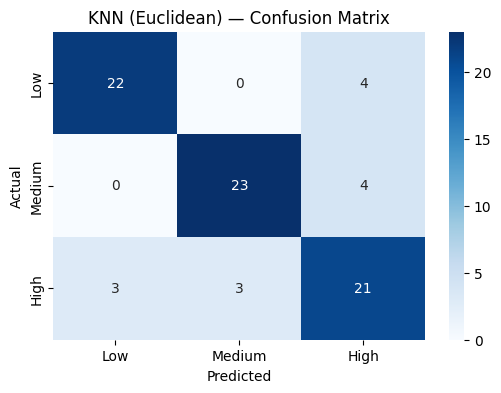

In [631]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_knn_euc)

plt.figure(figsize=(6,4))
sns.heatmap(
    cm, annot=True, fmt="d", cmap="Blues",
    xticklabels=["Low", "Medium", "High"],
    yticklabels=["Low", "Medium", "High"]
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("KNN (Euclidean) — Confusion Matrix")
plt.show()


In [632]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_clf = LinearDiscriminantAnalysis()
lda_clf.fit(X_train, y_train)

# Predictions
y_pred_lda = lda_clf.predict(X_test)
train_accuracy_lda = lda.score(X_train, y_train)
print("Training Accuracy:", train_accuracy_lda)


Training Accuracy: 0.9556962025316456


In [633]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score
)

acc_lda = accuracy_score(y_test, y_pred_lda)
pre_lda = precision_score(y_test, y_pred_lda, average="weighted")
rec_lda = recall_score(y_test, y_pred_lda, average="weighted")
f1_lda = f1_score(y_test, y_pred_lda, average="weighted")

print("Accuracy:", acc_lda)
print("Precision:", pre_lda)
print("Recall:", rec_lda)
print("F1 Score:", f1_lda)


Accuracy: 0.9625
Precision: 0.9647321428571429
Recall: 0.9625
F1 Score: 0.9619736581501286


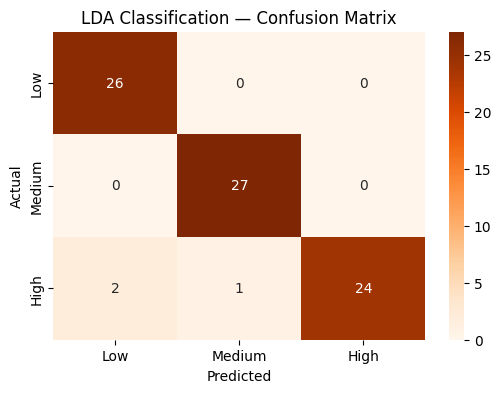


=== Overfitting/Underfitting Check for LinearDiscriminantAnalysis ===
Training Accuracy: 0.9557
Testing Accuracy : 0.9625
✅ The model is WELL-FITTED.
Training and testing performance are close.


In [634]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_lda)

plt.figure(figsize=(6,4))
sns.heatmap(
    cm, annot=True, cmap="Oranges", fmt="d",
    xticklabels=["Low", "Medium", "High"],
    yticklabels=["Low", "Medium", "High"]
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("LDA Classification — Confusion Matrix")
plt.show()
check_overfitting("LinearDiscriminantAnalysis",train_accuracy_lda, acc_lda)


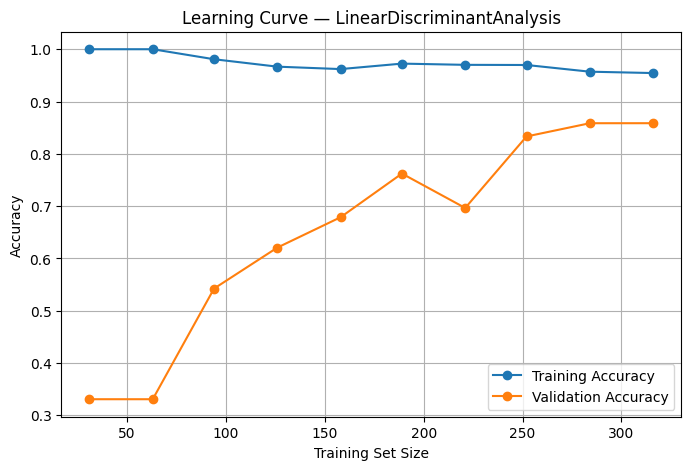


📌 Interpretation for LinearDiscriminantAnalysis:
✅ Model is well-fitted: Training and validation accuracies are close.


In [635]:
plot_learning_curve(lda_clf, X, y, "LinearDiscriminantAnalysis")

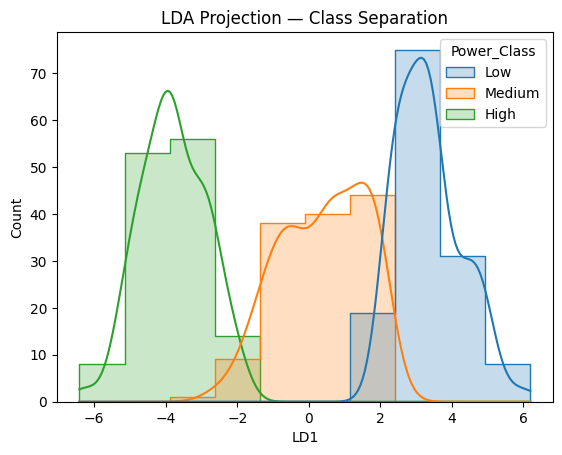

In [636]:
import pandas as pd

X_lda_proj = lda_clf.transform(X)

proj_df = pd.DataFrame({
    "LD1": X_lda_proj[:, 0],
    "Power_Class": y
})

sns.histplot(data=proj_df, x="LD1", hue="Power_Class", kde=True, element="step")
plt.title("LDA Projection — Class Separation")
plt.show()


In [637]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=5, random_state=42)
x_train_svd = svd.fit_transform(x_train_scaled)
x_test_svd = svd.transform(x_test_scaled)

# Explained variance
explained_var = svd.explained_variance_ratio_
print("Explained variance per component:", explained_var)
print("Total explained variance:", explained_var.sum())

Explained variance per component: [0.35658844 0.24211109 0.17202295 0.0854853  0.07190541]
Total explained variance: 0.9281131823873514


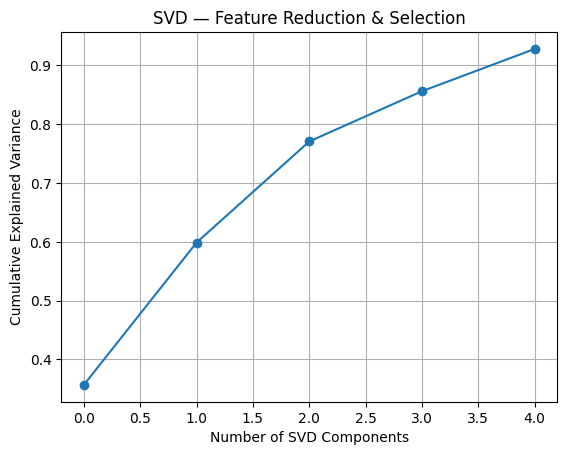

In [638]:
plt.figure()
plt.plot(np.cumsum(explained_var), marker='o')
plt.xlabel("Number of SVD Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("SVD — Feature Reduction & Selection")
plt.grid(True)
plt.show()

In [639]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X_train_svd, X_test_svd, y_train, y_test = train_test_split(
    X_svd, y, test_size=0.2, random_state=42
)

knn_svd = KNeighborsClassifier(n_neighbors=5)
knn_svd.fit(X_train_svd, y_train)

y_pred_knn_svd = knn_svd.predict(X_test_svd)
print("KNN Accuracy with SVD:", accuracy_score(y_test, y_pred_knn_svd))


KNN Accuracy with SVD: 0.8375


In [640]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)   # You can choose 2 or 3
X_train_pca = pca.fit_transform(x_train_scaled)
X_test_pca = pca.transform(x_test_scaled)

print("Explained variance ratio:", pca.explained_variance_ratio_)


Explained variance ratio: [0.35658844 0.24211109]


In [641]:
from sklearn.neighbors import KNeighborsClassifier

knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)

y_pred_pca = knn_pca.predict(X_test_pca)
train_accuracy_pca = knn_pca.score(X_train_pca, y_train)



In [642]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score
)

acc_pca = accuracy_score(y_test, y_pred_pca)
pre_pca = precision_score(y_test, y_pred_pca, average="weighted")
rec_pca = recall_score(y_test, y_pred_pca, average="weighted")
f1_pca = f1_score(y_test, y_pred_pca, average="weighted")

print("Accuracy:", acc_pca)
print("Precision:", pre_pca)
print("Recall:", rec_pca)
print("F1 Score:", f1_pca)


Accuracy: 0.4125
Precision: 0.4104955808080808
Recall: 0.4125
F1 Score: 0.4095833333333333


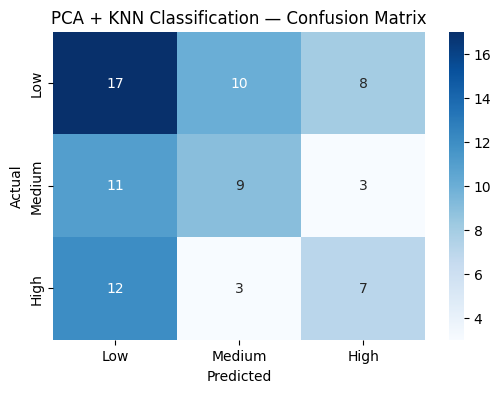

In [643]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_pca)

plt.figure(figsize=(6,4))
sns.heatmap(
    cm, annot=True, fmt="d", cmap="Blues",
    xticklabels=["Low", "Medium", "High"],
    yticklabels=["Low", "Medium", "High"]
)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("PCA + KNN Classification — Confusion Matrix")
plt.show()



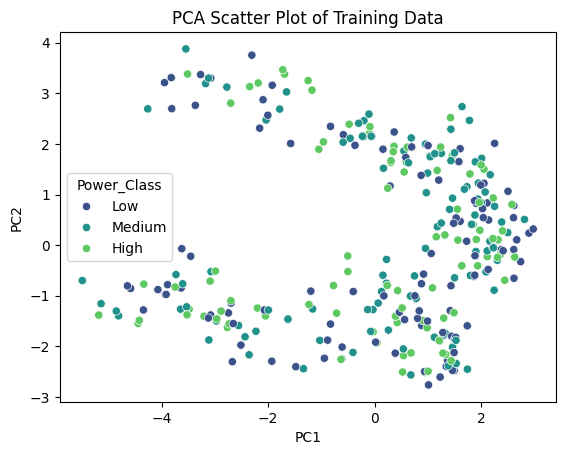

In [644]:
import pandas as pd

pca_df = pd.DataFrame({
    "PC1": X_train_pca[:, 0],
    "PC2": X_train_pca[:, 1],
    "Power_Class": y_train.values
})

sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Power_Class", palette="viridis")
plt.title("PCA Scatter Plot of Training Data")
plt.show()


In [645]:
results = {
    "Naive Bayes":      [acc_nb,  precision_nb,  recall_nb,  f1_nb],
    "Decision Tree":    [acc_dt,  pre_dt,  rec_dt,  f1_dt],
    "LDA":              [acc_lda, pre_lda, rec_lda, f1_lda],
    "PCA + KNN":        [acc_pca, pre_pca, rec_pca, f1_pca],
    "KNN":              [acc_knn, pre_knn, rec_knn, f1_knn],
    "SVM":              [acc_svm, pre_svm, rec_svm, f1_svm],
    "Random Forest":    [acc_rf,  pre_rf,  rec_rf,  f1_rf],
    "XGBoost":          [acc_xgb, pre_xgb, rec_xgb, f1_xgb]
}


In [646]:
import pandas as pd

metrics_df = pd.DataFrame(
    results,
    index=["Accuracy", "Precision", "Recall", "F1 Score"]
).T

metrics_df


,Accuracy,Precision,Recall,F1 Score
Naive Bayes,0.8375,0.839625,0.8375,0.838365
Decision Tree,0.9875,0.987963,0.9875,0.987500
LDA,0.9625,0.964732,0.9625,0.961974
PCA + KNN,0.4125,0.410496,0.4125,0.409583
KNN,0.8125,0.825770,0.8125,0.815843
SVM,0.8500,0.850786,0.8500,0.850183
Random Forest,0.9625,0.962945,0.9625,0.962500
XGBoost,1.0000,1.000000,1.0000,1.000000


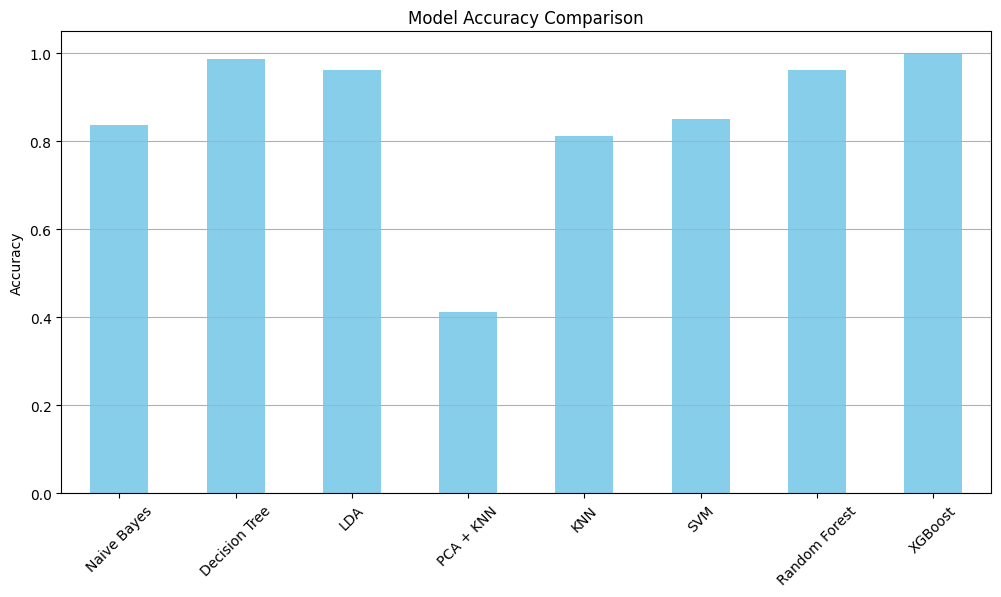

In [647]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
metrics_df["Accuracy"].plot(kind="bar", color='skyblue')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


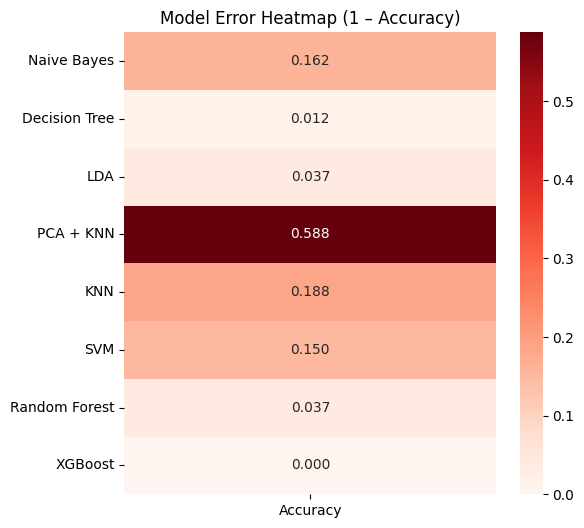

In [648]:
import seaborn as sns

error_df = 1 - metrics_df[["Accuracy"]]

plt.figure(figsize=(6,6))
sns.heatmap(error_df, annot=True, cmap="Reds", fmt=".3f")
plt.title("Model Error Heatmap (1 – Accuracy)")
plt.show()


In [649]:
metrics_df.sort_values(by="Accuracy", ascending=False)


,Accuracy,Precision,Recall,F1 Score
XGBoost,1.0000,1.000000,1.0000,1.000000
Decision Tree,0.9875,0.987963,0.9875,0.987500
Random Forest,0.9625,0.962945,0.9625,0.962500
LDA,0.9625,0.964732,0.9625,0.961974
SVM,0.8500,0.850786,0.8500,0.850183
Naive Bayes,0.8375,0.839625,0.8375,0.838365
KNN,0.8125,0.825770,0.8125,0.815843
PCA + KNN,0.4125,0.410496,0.4125,0.409583
